#### Isobaric_LH2

* This notebook sets up the isobaric evaporation of liquid hydrogen in a retrofitted LNG storage tank
* Coolprop will be called to retrieve the cryogen thermophysical properties. Hence, the cryogen will be specificied in the notebook

## Desired input and output
* Tank characteristics: .CSV file with tank geometrical properties
* Cryogen: .CSV file with the cryogen ID consistent with coolprop
* Popular cryogens: hydrogen, methane, nitrogen, oxygen.


In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from storage_tanks import Tank

# Import Cryogen class
from cryogens import Cryogen

#### Use example

Analyse BOG rates of liquid hydrogen in a retrofitted LNG storage tank,and compare it to methane BOG rates

In [2]:
# Retrofitted LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 76.4 # Internal diameter / m
d_o = 80   # External diameter / m
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 10*0.0371 # W/m2/K
U_V = 10*0.0371 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 60000 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3

# Initial liquid filling / Dimensionless
LF = 0.97 

# Specify tank operating pressure
P = 100000 # Pa

# Initialize tank
large_tank = Tank(d_i, d_o, V_tank, LF)
large_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b)

In [3]:
methane = Cryogen(name = "methane")
methane.set_coolprops("methane", P)
large_tank.cryogen = methane
print("The evaporation rate of " + methane.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

# Initialise hydrogen using CoolProp dependency
hydrogen = Cryogen(name="hydrogen")
# Initialise thermodynamic properties at the tank operating pressure
hydrogen.set_coolprops(hydrogen.name, P)
large_tank.cryogen = hydrogen

# Evaporation rate
print("The evaporation rate of " + hydrogen.name + " in the tank is %.1f kg/h" % (large_tank.b_l_dot * 3600))
print("Equivalent to %.1f g/s" % (large_tank.b_l_dot * 1000))

The evaporation rate of methane is 4164.8 kg/h
The evaporation rate of hydrogen in the tank is 7122.2 kg/h
Equivalent to 1978.4 g/s


Liquid nitrogen properties for Linde tank calculations

#### Simulate liquid hydrogen evaporation 

In [4]:
# large_tank.evaporate(3600*24*7*52)
large_tank.z_grid = np.linspace(0, large_tank.l * (1-large_tank.LF), 40)
# large_tank.U_roof = 0
large_tank.evaporate(3600*24)

t = 0.000 s
Tv_avg = 23.277
t = 8.973 s
Tv_avg = 23.338
t = 0.020 s
Tv_avg = 23.277
t = 0.030 s
Tv_avg = 23.277
t = 0.079 s
Tv_avg = 23.277
t = 0.088 s
Tv_avg = 23.277
t = 0.099 s
Tv_avg = 23.277
t = 0.099 s
Tv_avg = 23.277
t = 0.156 s
Tv_avg = 23.278
t = 0.184 s
Tv_avg = 23.278
t = 0.326 s
Tv_avg = 23.279
t = 0.351 s
Tv_avg = 23.279
t = 0.383 s
Tv_avg = 23.279
t = 0.383 s
Tv_avg = 23.279
t = 0.951 s
Tv_avg = 23.283
t = 1.235 s
Tv_avg = 23.285
t = 2.656 s
Tv_avg = 23.294
t = 2.909 s
Tv_avg = 23.296
t = 3.224 s
Tv_avg = 23.298
t = 3.224 s
Tv_avg = 23.298
t = 8.908 s
Tv_avg = 23.334
t = 11.749 s
Tv_avg = 23.350


c:\Users\fnhue\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `solver`.
  warn("The following arguments have no effect for a chosen solver: {}."


t = 25.957 s
Tv_avg = 23.431
t = 28.483 s
Tv_avg = 23.446
t = 31.640 s
Tv_avg = 23.462
t = 31.640 s
Tv_avg = 23.459
t = 37.875 s
Tv_avg = 23.490
t = 40.993 s
Tv_avg = 23.503
t = 56.581 s
Tv_avg = 23.571
t = 59.352 s
Tv_avg = 23.585
t = 62.816 s
Tv_avg = 23.598
t = 62.816 s
Tv_avg = 23.594
t = 69.625 s
Tv_avg = 23.620
t = 73.030 s
Tv_avg = 23.631
t = 90.054 s
Tv_avg = 23.688
t = 93.080 s
Tv_avg = 23.699
t = 96.864 s
Tv_avg = 23.710
t = 96.864 s
Tv_avg = 23.707
t = 104.365 s
Tv_avg = 23.728
t = 108.116 s
Tv_avg = 23.738
t = 126.870 s
Tv_avg = 23.785
t = 130.204 s
Tv_avg = 23.794
t = 134.371 s
Tv_avg = 23.804
t = 134.371 s
Tv_avg = 23.800
t = 142.682 s
Tv_avg = 23.818
t = 146.837 s
Tv_avg = 23.826
t = 167.613 s
Tv_avg = 23.865
t = 171.306 s
Tv_avg = 23.873
t = 175.923 s
Tv_avg = 23.881
t = 175.923 s
Tv_avg = 23.878
t = 185.188 s
Tv_avg = 23.893
t = 189.820 s
Tv_avg = 23.899
t = 212.982 s
Tv_avg = 23.932
t = 217.100 s
Tv_avg = 23.939
t = 222.247 s
Tv_avg = 23.945
t = 222.247 s
Tv_avg = 23.

Plot vapour temperature profile

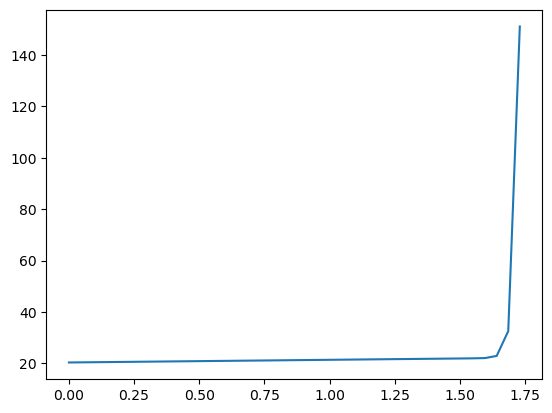

In [8]:
z = (large_tank.l * (1-large_tank.LF))* large_tank.z_grid
T_end = large_tank.sol.y[1:, -1]
plt.plot(z, T_end)

Text(0, 0.5, '$ V_L / m^3$')

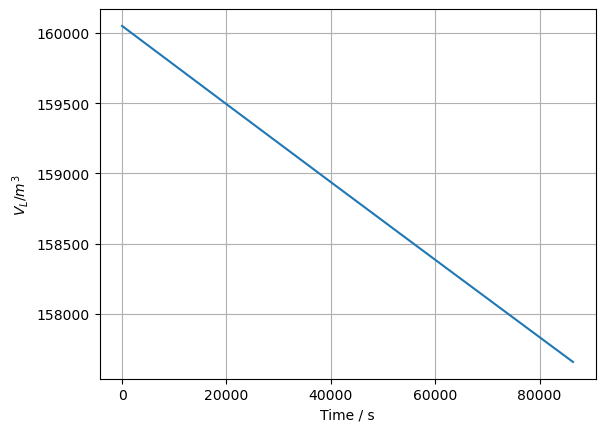

In [6]:
# Access to the liquid volume
plt.plot(large_tank.sol.t, large_tank.sol.y[0])
plt.grid()
plt.xlabel('Time / s')
plt.ylabel('$ V_L / m^3$')

Text(0, 0.5, '$ B_L / kg/h$')

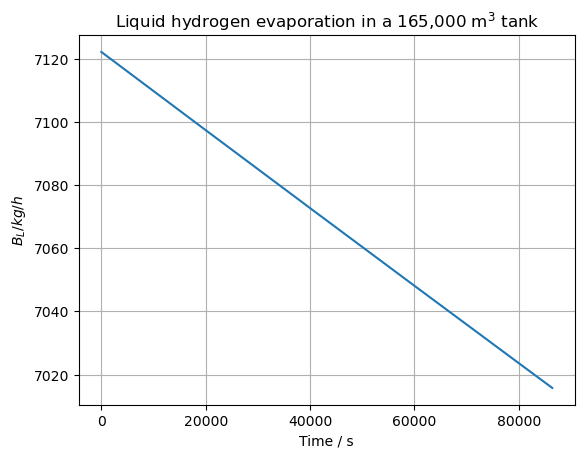

In [7]:
# Extract evaporation rate and convert to kg/h
B_L = large_tank.evap_rate() * 3600

# Visualise evaporation rate
plt.plot(large_tank.sol.t, B_L) 
plt.grid()
plt.title("Liquid hydrogen evaporation in a 165,000 m$^3$ tank")
plt.xlabel('Time / s')
plt.ylabel('$ B_L / kg/h$')